In [14]:
import pandas as pd
import numpy as np
import os
f_base = '../长三角城市年度数据/'
files = os.listdir(f_base)
files

['上海市_113个指标.xls',
 '安徽省合肥_111个指标.xls',
 '安徽省安庆_112个指标.xls',
 '安徽省宣城_112个指标.xls',
 '安徽省池州_112个指标.xls',
 '安徽省滁州_112个指标.xls',
 '安徽省芜湖_112个指标.xls',
 '安徽省铜陵_112个指标.xls',
 '安徽省马鞍山_111个指标.xls',
 '江苏省南京市_113个指标.xls',
 '江苏省南通市_113个指标.xls',
 '江苏省常州市_113个指标.xls',
 '江苏省扬州市_113个指标.xls',
 '江苏省无锡市_113个指标.xls',
 '江苏省泰州_113个指标.xls',
 '江苏省盐城市_113个指标.xls',
 '江苏省苏州市_113个指标.xls',
 '江苏省镇江市_113个指标.xls',
 '浙江省台州_112个指标.xls',
 '浙江省嘉兴_113个指标.xls',
 '浙江省宁波_113个指标.xls',
 '浙江省杭州_113个指标.xls',
 '浙江省温州_113个指标.xls',
 '浙江省湖州_112个指标.xls',
 '浙江省绍兴_112个指标.xls',
 '浙江省舟山_112个指标.xls',
 '浙江省金华_112个指标.xls']

In [15]:
# 归一化
def Normalized(data):
    '''
    s = （s - min）/（max-min）
    '''
#     for i in data.columns:
#         data[i]=round((data[i]-np.mean(data[i]))/(np.max(data[i])-np.min(data[i])),3)
    data = (data - data.min()) / (data.max() - data.min())
    return data

In [16]:
def Sum_score(data,col):
    '''
    分数总和命名为col
    将小分加起来
    '''
    sum_score = pd.DataFrame(columns=col)
    for i in data.index:
        sum_score.loc[i] = np.mean(data.loc[i])
    return sum_score

In [17]:
def Eduscore(data,localname,eduscore):
    local_eduscore = pd.DataFrame()
    local_eduscore['教育投入占比'] = data['一般公共预算支出_教育_市辖区']/data['GDP_市辖区']
    local_eduscore['师生比'] = (data['普通高等学校在校生数_市辖区']+data['普通中学在校生数_市辖区']+data['普通小学在校生数_市辖区'])/(data['普通高等学校专任教师数_市辖区']+data['普通中学专任教师数_市辖区']+data['普通小学专任教师数_市辖区'])
    local_eduscore['公共图书馆占比'] = data['公共图书馆总藏量_市辖区'] / data['城市户籍人口数']
    eduscore1 = pd.DataFrame(columns = ['教育投入占比','师生比','公共图书馆占比'])
    eduscore1.loc[localname] = [np.mean(local_eduscore['教育投入占比']),np.mean(local_eduscore['师生比']),np.mean(local_eduscore['公共图书馆占比'])]
    eduscore =pd.concat([eduscore,eduscore1],axis=0)
    return eduscore

In [35]:
def Traffic(data,localname,trafficscore):
    traffic_data = pd.DataFrame()
    traffic_data['道路'] = data['城市道路面积']/data['城市建成区面积']
    traffic_data['交通从业人员比例'] = data['城镇单位就业人员数_交通运输、仓储和邮政业_市辖区']/data['城镇单位在岗职工人数_市辖区']
    traffic_data['公共交通'] = (data['出租汽车运营数_市辖区']+data['公共汽、电车运营数_市辖区'])/data['城市年末公共汽(电)车客运总量']
    trafficscore1 = pd.DataFrame(columns = ['道路','交通从业人员比例','公共交通'])
    trafficscore1.loc[localname] = [np.mean(traffic_data['道路']),np.mean(traffic_data['交通从业人员比例']),np.mean(traffic_data['公共交通'])]
    trafficscore =pd.concat([trafficscore,trafficscore1],axis=0)
    return trafficscore

In [ ]:
def Medical(data,localname,medicalscore):
    medical_data = pd.DataFrame()
    medical_data['医师'] = data['医院和卫生院卫生人员数_执业(助理)医师_市辖区']/data['城市户籍人口数']
    medical_data['医疗机构'] = data['医疗卫生机构数_医院和卫生院_市辖区']/data['城市户籍人口数']
    medical_data['公共交通'] = (data['出租汽车运营数_市辖区']+data['公共汽、电车运营数_市辖区'])/data['城市年末公共汽(电)车客运总量']
    medicalscore1 = pd.DataFrame(columns = ['道路','交通从业人员比例','公共交通'])
    medicalscore1.loc[localname] = [np.mean(medical_data['道路']),np.mean(medical_data['交通从业人员比例']),np.mean(medical_data['公共交通'])]
    medicalscore =pd.concat([medicalscore,medicalscore1],axis=0)
    return medicalscore

In [36]:
def Score():
    score = pd.DataFrame()
    eduscore = pd.DataFrame()
    trafficscore = pd.DataFrame()
    for f in files:
        '''
        每个地区数据预处理
        本次只根据2016年的数据进行计算
        '''
        data = pd.read_excel(f_base+f)
        data['地区']= data.iloc[0,1]
        localname = data.iloc[0,1]
        data.drop(index=[0,1,2],inplace=True)
        data.index=data['指标']
        data.index.name='年份'
        data.drop(columns=['指标'],inplace=True)
        data.columns.name='指标'
        # data = data.convert_dtypes()
        data.describe()
        '''计算得分'''
        eduscore = Eduscore(data,localname,eduscore)
        trafficscore = Traffic(data,localname,trafficscore)
    # eduscore
    eduscore.to_excel('../细分指标/教育细分指标.xlsx')
    eduscore = Normalized(eduscore)
    plt = eduscore.plot.bar(figsize=(15,10),title = '教育细分指标')
    img = plt.get_figure()
    img.savefig('../image/eduscore.png')
    eduscore = round(Sum_score((eduscore),['教育'])*10,1)
    
    # traffic
    trafficscore.to_excel('../细分指标/交通细分指标.xlsx')
    trafficscore = Normalized(trafficscore)
    plt = trafficscore.plot.bar(figsize=(15,10),title = '交通细分指标')
    img = plt.get_figure()
    img.savefig('../image/trafficscore.png')
    trafficscore = round(Sum_score((trafficscore),['交通'])*10,1)

    # medical
    medicalscore.to_excel('../细分指标/医疗细分指标.xlsx')
    medicalscore = Normalized(medicalscore)
    plt = medicalscore.plot.bar(figsize=(15,10),title = '医疗细分指标')
    img = plt.get_figure()
    img.savefig('../image/medicalscore.png')
    medicalscore = round(Sum_score((medicalscore),['医疗'])*10,1)

    # score
    score=pd.concat([eduscore,trafficscore,medicalscore],axis = 1)
    score['得分']=score.mean(axis=1)
    return score

In [47]:
score.mean(axis=1).sort_values()

铜陵市     1.55
马鞍山市    1.55
绍兴市     2.10
嘉兴市     2.25
温州市     2.40
台州市     2.55
扬州市     2.60
苏州市     2.65
湖州市     2.65
宁波市     2.70
无锡市     2.80
宣城市     2.95
安庆市     3.05
盐城市     3.05
泰州市     3.15
杭州市     3.25
常州市     3.25
镇江市     3.40
南通市     3.45
滁州市     3.95
芜湖市     4.15
合肥市     4.20
金华市     4.25
舟山市     4.35
南京市     4.75
池州市     5.20
上海市     6.00
dtype: float64

,教育得分,得分
上海市,6.8,5.2
合肥市,5.0,3.4
安庆市,2.3,3.8
宣城市,2.3,3.6
池州市,4.2,6.2
滁州市,3.5,4.4
芜湖市,4.0,4.3
铜陵市,2.1,1.0
马鞍山市,2.0,1.1
南京市,5.3,4.2


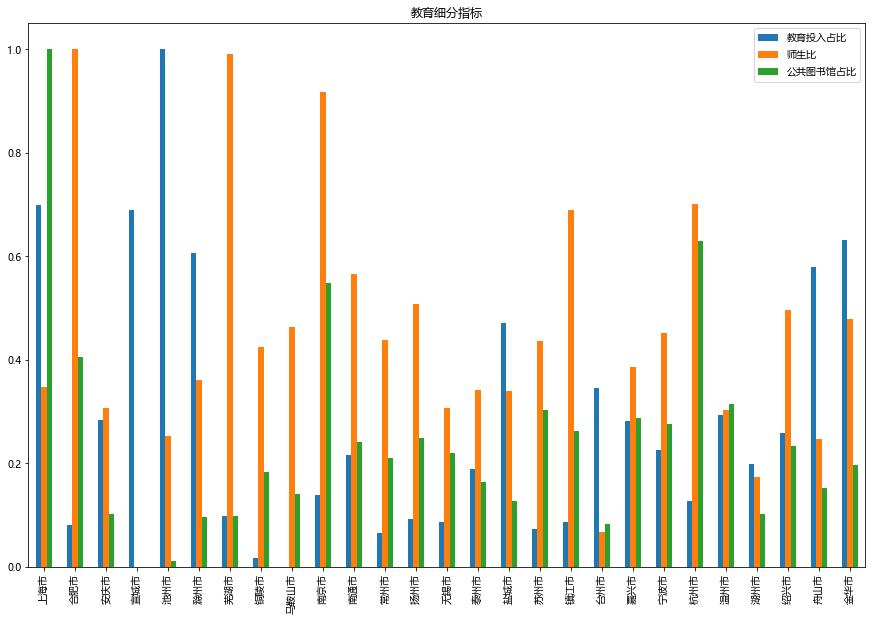

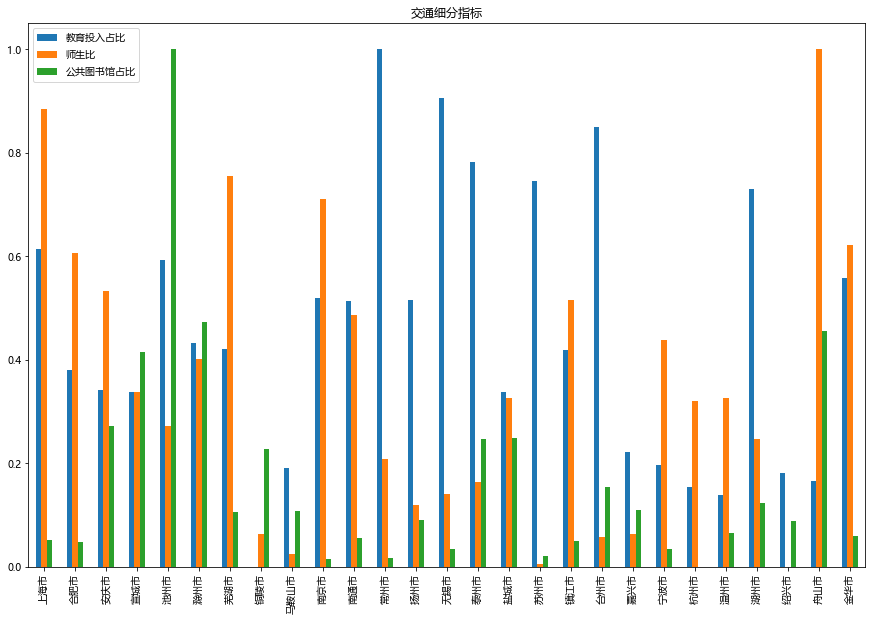

In [37]:
score = Score()
score

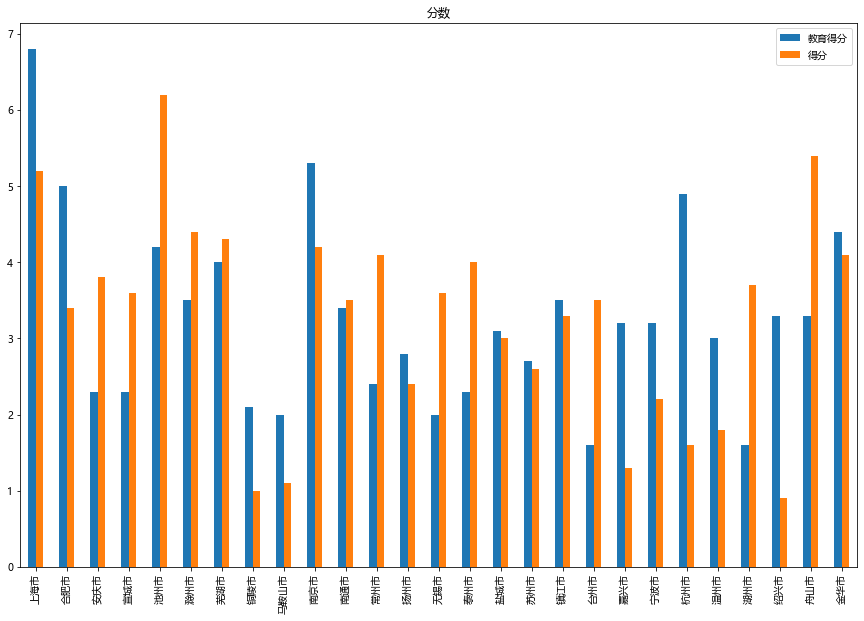

In [38]:
%matplotlib inline
plt = score.plot.bar(figsize=(15,10),title = '分数')
img = plt.get_figure()
img.savefig('../image/score.png')

In [39]:
score.to_excel('../指标.xlsx')